## Final Exam - DS412 Time Series Analysis and Stochastic Methods

Name: Genheylou D. Felisilda <br>
Section: DS4A

### Part 1. Essay (Situational/Applied) Questions|

**Q1.** Differentiate and elaborate ARIMA from SARIMA and vice versa. You can use illustrations and mathematical expression should you want to.

_**ARIMA is using (yesterday) past correlation to predict the future (tomorrow). Whereas, the SARIMA is using the year or months seasonal patterns as past to predict the future. To elaborate, ARIMA is used to predict the trend whether it will be up or down, it is not good when it comes to catching seasonality. With that lackings, here comes SARIMA it is designed to catch the seasonality of the data an also the trend.**_

**Q2.** Given that we have undergone a couple of metrics in calculating error for TSA, choose 3 among all those metrics and elaborate. 

_- **MAE - measures the average absolute difference between forecasts and actuals to easily interpret.**_ <br>
_- **RMSE - it squares errors before averaging so it will penalize larger errors more heavily.**_ <br>
_- **MAPE - this expresses average absolute error as as a percentage of actuals and gives a straightforward comparison but is prone to misleading results.**_

**Q3.** Given the implementation of baseline predictions below, kindly differentiate **mean forecasts** from **naive forecasts**.

<code>def meanf(ts, h):
    f = np.mean(ts)
    f = np.repeat(f, repeats=h)
    return f
</code>
    
<code>def naivef(ts, h):
    f = ts[-1]
    f = np.repeat(f, repeats=h)
    return f 
</code>

_**Mean forecast is when it will predict the the future by using its past from a mean of the year or months ago. Whereas, Naive Forecast is when it will predict the future using yesterday's data into tomorrow's prediction.**_

**Q4.** Based on your understanding, explain the **LightGBM** algorithm in tiime series forecasting. 

_(Insert Answer Here)_

**Q5.** In machine learning time series forecasting, why do we need to divide the dataset into train and test? 

_**To avoid data leak**_

### Part 2. Time Series Forecasting (Code Implementation) 

Instructions: Document and explain your code as you go along the items. The better documentation, the higher the points. 

**Problem 1.** Predicting Google's Stock Price using ARIMA

Document your code properly and satisfy the following conditions:

1. Create an ARIMA model in predicting the **Quarterly Google Stock Price** from the `goog200.csv` dataset provided in this same repository. 
2. Assume that the dataset is of quarterly intervals
3. Just use the **most recent** 20 years of data (i.e 80 quarters or datapoints). 
4. Visualize the dataset.
5. Find the optimal ARIMA model from the following set of p, d, q values: 
> p: from 0 to 5 <br>
> d: d = 1 <br>
> q: from 0 to 5

6. Predict the next 2 years of data (8 quarters). Plot the predictions together with the historical data
7. Evaluate the performance of the model using RMSE. 

In [3]:
# import libraries for ARIMA

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset and using only the recent 20 years of data or 80 quarters
data = pd.read_csv('goog200.csv')
data = data.tail(80).reset_index(drop=True)
data['index'] = pd.date_range(start='2004-01-01', periods=len(data), freq='Q')

data


C:\Users\DS LAB PC 14\AppData\Local\Temp\ipykernel_7600\129846504.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data['index'] = pd.date_range(start='2004-01-01', periods=len(data), freq='Q')


,index,value
0,2004-03-31,427.052429
1,2004-06-30,425.686310
2,2004-09-30,430.028076
3,2004-12-31,429.913818
4,2005-03-31,431.856201
...,...,...
75,2022-12-31,523.832947
76,2023-03-31,523.226929
77,2023-06-30,525.671021
78,2023-09-30,525.253723


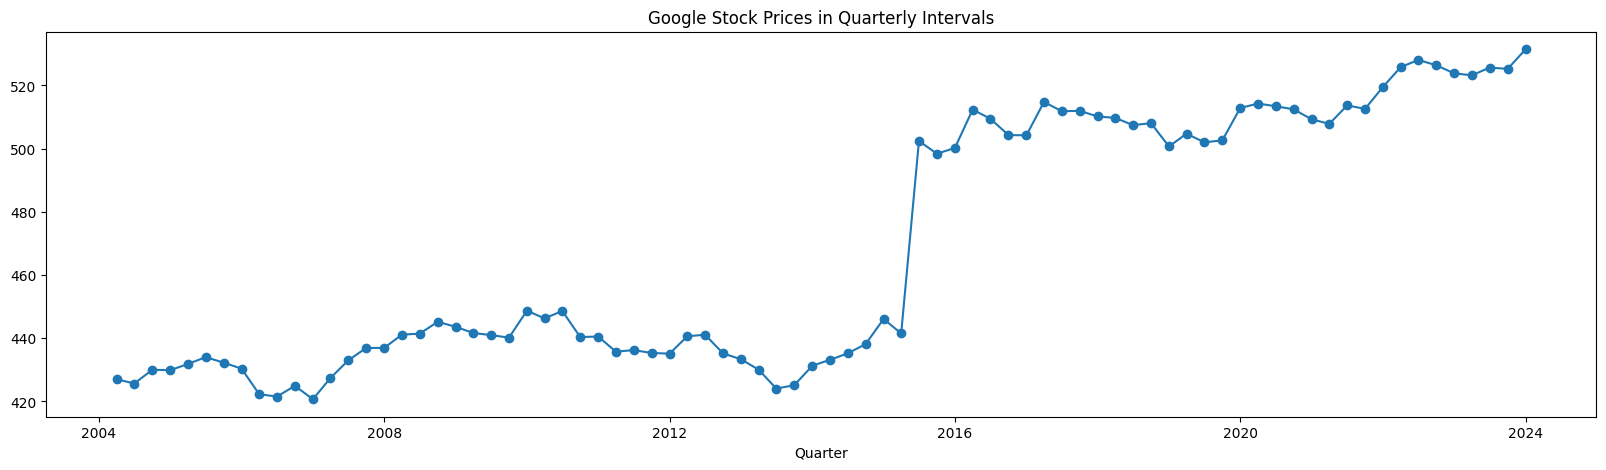

In [4]:
# plot the dataset 

plt.figure(figsize=(20,5))
plt.plot(data['index'], data['value'], marker='o',)
plt.title('Google Stock Prices in Quarterly Intervals')
plt.xlabel('Quarter')
plt.show()


the above graph shows trend and structural break, no seasonality. now let's see if this is stationary or not.

In [5]:
# ad-fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.") 

ADF Statistic: -0.5077584664241133
p-value: 0.8904935706385662
The time series is non-stationary.


In [6]:
# log differencing to make the series stationary

data['log_value'] = np.log(data['value'])
data['log_diff'] = data['log_value'].diff().dropna()

data = data.dropna()
result = adfuller(data['log_diff'])
print('ADF Statistic after log differencing:', result[0])

ADF Statistic after log differencing: -9.936150459553868


with adf test result after log differencing it is now Stationary with a value less than 0.05, which is -9.936150459553868, to check visually we will plot acf and pacf.

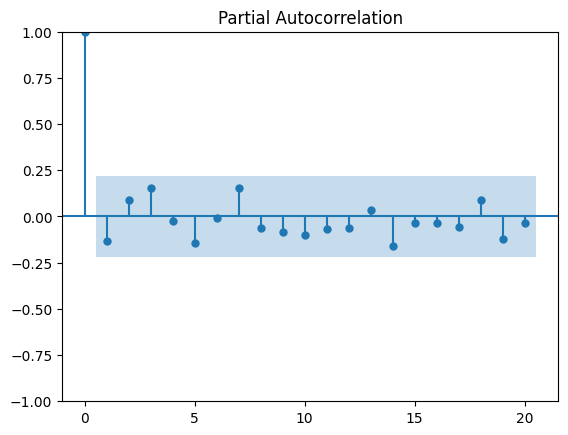

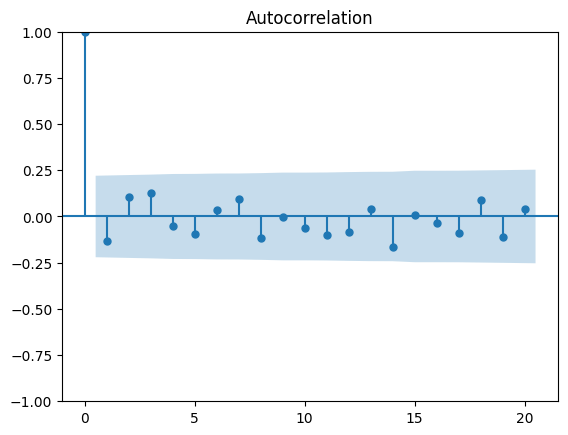

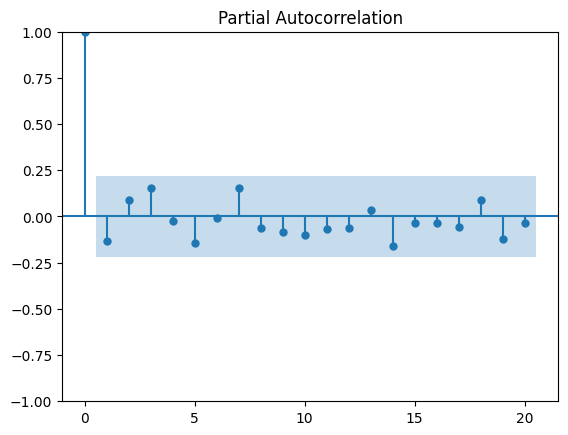

In [7]:
# plot the acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['log_diff'], lags=20)
plot_pacf(data['log_diff'], lags=20)

In [8]:
# optimal p,d,q values
p = range(0, 5)
d = 1
q = range(0, 5)

# find the optimal p,d,q values based on AIC
import itertools
import warnings
warnings.filterwarnings("ignore")

aic_values = {}
for param in itertools.product(p, [d], q):
    try:
        model = ARIMA(data['log_diff'], order=param)
        model_fit = model.fit()
        aic_values[param] = model_fit.aic
    except:
        continue
optimal_params = min(aic_values, key=aic_values.get)
print("Optimal p,d,q values:", optimal_params)

Optimal p,d,q values: (0, 1, 1)


In [10]:
# best model fitting
model = ARIMA(data['log_diff'], order=optimal_params)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               log_diff   No. Observations:                   79
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 205.035
Date:                Fri, 12 Dec 2025   AIC                           -406.070
Time:                        18:14:30   BIC                           -401.357
Sample:                             0   HQIC                          -404.183
                                 - 79                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999     35.643     -0.028      0.978     -70.860      68.860
sigma2         0.0003      0.010      0.028      0.978      -0.020       0.020
Ljung-Box (L1) (Q):                   1.40   Jarque-

Forecasted log differences for next 8 quarters: 79    0.002769
80    0.002769
81    0.002769
82    0.002769
83    0.002769
84    0.002769
85    0.002769
86    0.002769
Name: predicted_mean, dtype: float64
Forecasted stock prices for next 8 quarters: 79    532.952005
80    534.429826
81    535.911745
82    537.397773
83    538.887921
84    540.382202
85    541.880626
86    543.383205
Name: predicted_mean, dtype: float64


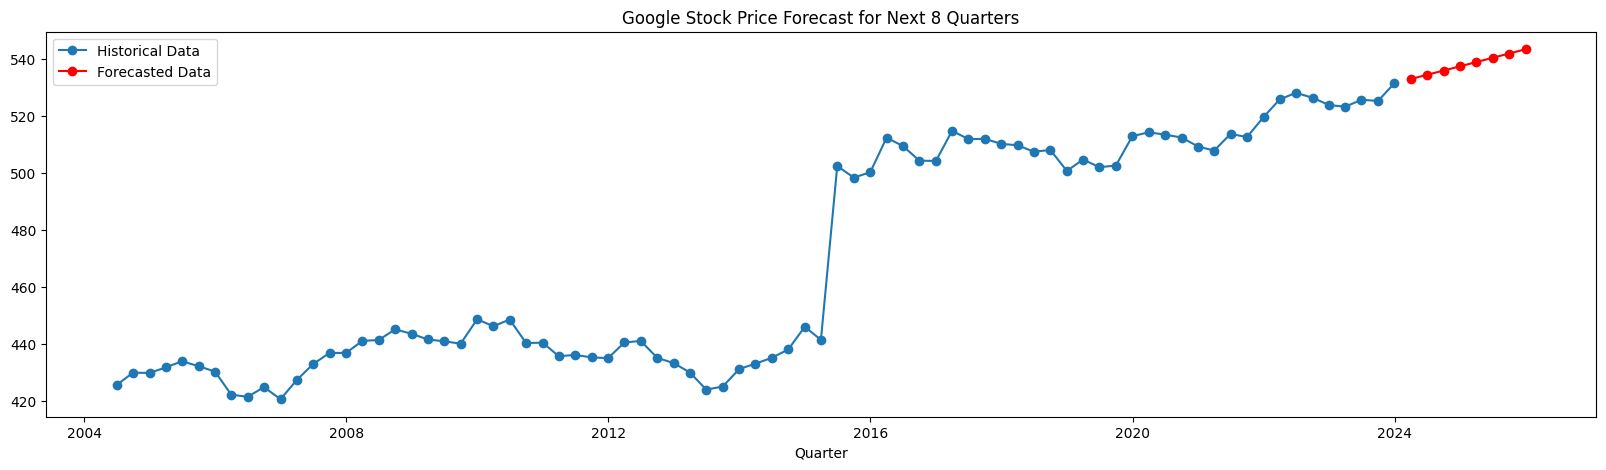

In [14]:
# forecasting the next 8 quarters

forecast = model_fit.forecast(steps=8)
print("Forecasted log differences for next 8 quarters:", forecast)

# convert log differences back to original scale
last_log_value = data['log_value'].iloc[-1]
forecasted_values = np.exp(last_log_value + np.cumsum(forecast))
print("Forecasted stock prices for next 8 quarters:", forecasted_values)

# plot the forecasted values
plt.figure(figsize=(20,5))
plt.plot(data['index'], data['value'], marker='o', label='Historical Data')

# create future quarter datetimes — add 3 months to the last timestamp then generate 8 quarterly periods
future_indices = pd.date_range(start=data['index'].iloc[-1] + pd.DateOffset(months=3), periods=8, freq='Q')
plt.plot(future_indices, forecasted_values.values, marker='o', color='red', label='Forecasted Data')
plt.title('Google Stock Price Forecast for Next 8 Quarters')
plt.xlabel('Quarter')
plt.legend()
plt.show()




**with the forecast graph above, we can see that it forecast the next 8 quarters or 2 years with an upward trend.**

In [15]:
# evaluate performance using RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(data['log_diff'], model_fit.fittedvalues))
print("RMSE of the model:", rmse)

RMSE of the model: 0.017146512697577297


**the lower the better**

**Problem 2.** Predicting Google's Stock Price using SARIMA

Document your code properly and satisfy the following conditions:

1. Create an ARIMA model in predicting the **Quarterly Google Stock Price** from the `goog200.csv` dataset provided in this same repository. 
2. Assume that the dataset is of quarterly intervals
3. Just use the **most recent** 20 years of data (i.e 80 quarters or datapoints). 
4. Visualize the dataset.
5. Find the optimal ARIMA model from the following set of p, d, q values: 

> p: from 0 to 5; P: from 0 to 5 

> d: d = 1; D: D = 1

> q: from 0 to 5; Q: from 0 to 5 

6. Predict the next 2 years of data (8 quarters). Plot the predictions together with the historical data
7. Evaluate the performance of the model using RMSE. 

**I already loaded the data above I will now skip to finding the optimal order for SARIMA as it does have same procedures**

In [21]:
# find the optimal sarima parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX as SARIMA

p = range(0, 5)
d = 1
q = range(0, 5)
P = range(0, 5)
D = 1
Q = range(0, 5)
s = 8

# finding the optimal SARIMA parameters
aic_values = {}
for param in itertools.product(p, [d], q):
    for seasonal_param in itertools.product(P, [D], Q, [s]):  
        try:
            model = SARIMA(
                data['log_diff'],
                order=param,
                seasonal_order=seasonal_param,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            model_fit = model.fit(disp=False)
            aic_values[(param, seasonal_param)] = model_fit.aic
        except Exception:
            continue

optimal_params = min(aic_values, key=aic_values.get)
print("Optimal (p,d,q) and seasonal (P,D,Q,s) values:", optimal_params)

Optimal (p,d,q) and seasonal (P,D,Q,s) values: ((0, 1, 1), (0, 1, 0, 8))


In [22]:
data

,index,value,log_value,log_diff
1,2004-06-30,425.686310,6.053703,-0.003204
2,2004-09-30,430.028076,6.063850,0.010148
3,2004-12-31,429.913818,6.063585,-0.000266
4,2005-03-31,431.856201,6.068093,0.004508
5,2005-06-30,434.032043,6.073118,0.005026
...,...,...,...,...
75,2022-12-31,523.832947,6.261173,-0.004834
76,2023-03-31,523.226929,6.260015,-0.001158
77,2023-06-30,525.671021,6.264676,0.004660
78,2023-09-30,525.253723,6.263881,-0.000794


In [23]:
# SARIMA model fitting

best_model = SARIMA(data['log_diff'], order=optimal_params[0], seasonal_order=optimal_params[1])
best_model_fit = best_model.fit()
print(best_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           log_diff   No. Observations:                   79
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 8)   Log Likelihood                 152.567
Date:                            Fri, 12 Dec 2025   AIC                           -301.135
Time:                                    18:48:09   BIC                           -296.638
Sample:                                         0   HQIC                          -299.348
                                             - 79                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9900      0.236     -4.199      0.000      -1.452      -0.528
sigma2         0.0007      0.000   

Forecasted log differences for next 8 quarters (SARIMA): 79    0.012284
80    0.004854
81   -0.002894
82   -0.004412
83   -0.000735
84    0.005083
85   -0.000371
86    0.012204
Name: predicted_mean, dtype: float64
Forecasted stock prices for next 8 quarters (SARIMA): 79    538.047320
80    540.665155
81    539.102844
82    536.729812
83    536.335588
84    539.068783
85    538.868634
86    545.485108
Name: predicted_mean, dtype: float64


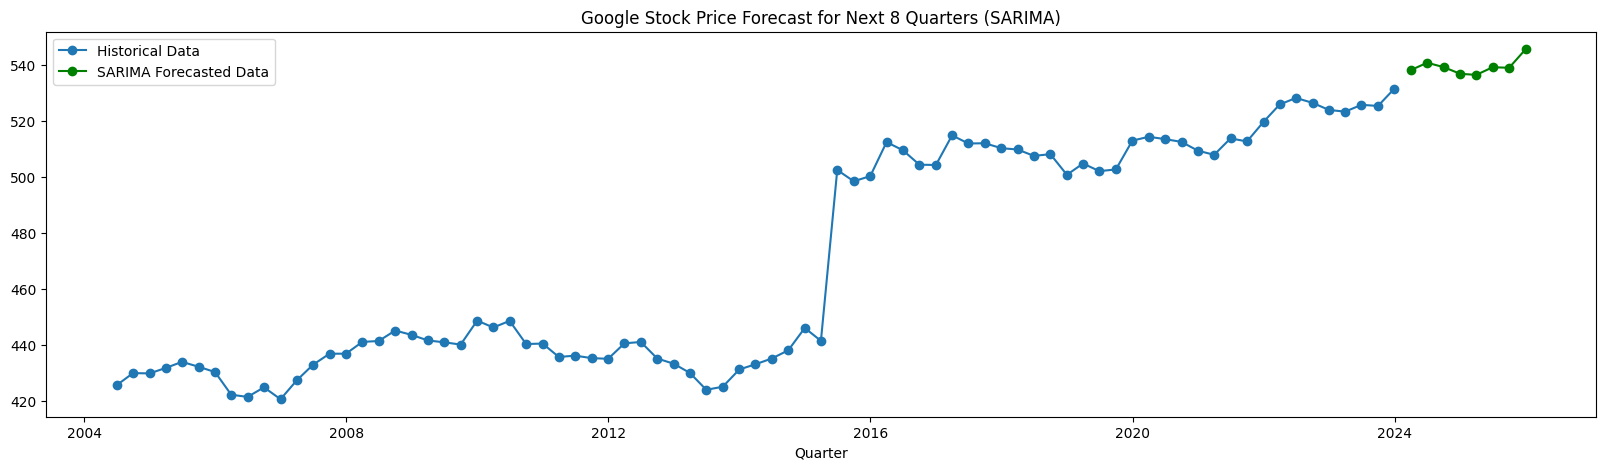

In [29]:
# forecasting
best_forecast = best_model_fit.forecast(steps=8)
print("Forecasted log differences for next 8 quarters (SARIMA):", best_forecast)
last_log_value = data['log_value'].iloc[-1]
forecasted_values_sarima = np.exp(last_log_value + np.cumsum(best_forecast))
print("Forecasted stock prices for next 8 quarters (SARIMA):", forecasted_values_sarima)

# plot the SARIMA forecasted values
plt.figure(figsize=(20,5))
plt.plot(data['index'], data['value'], marker='o', label='Historical Data')

# create future quarter datetimes — add 3 months to the last timestamp then generate 8 quarterly periods
future_indices = pd.date_range(start=data['index'].iloc[-1] + pd.DateOffset(months=3), periods=8, freq='Q')
plt.plot(future_indices, forecasted_values_sarima.values, marker='o', color='green', label='SARIMA Forecasted Data')
plt.title('Google Stock Price Forecast for Next 8 Quarters (SARIMA)')
plt.xlabel('Quarter')
plt.legend()
plt.show()


**In the forecast graph above, we can see that it actually looks like the historical data. Now, let's see statistically if the above forecast is good or not.**

In [30]:
# evaluate SARIMA performance using RMSE
rmse_sarima = np.sqrt(mean_squared_error(data['log_diff'], best_model_fit.fittedvalues))
print("RMSE of the SARIMA model:", rmse_sarima)

RMSE of the SARIMA model: 0.025617653802206312


**with the result, we can see that it is low. This indicates that the model is good for our dataset.**

**Problem 3.** Predicting Debit Card transactions using Exponential Smoothing

1. Use the provided data named `debitcards.csv`. <br> <br>
2. Visualize the data with proper axis labels and title. Interpret the visualization in 2-3 sentences. <br> <br>
3. Perform Simple Exponential Smoothing (SES) using the optimized SES parameters on the train data through `optimized=True`. The test size is equal to 4 months. Compare SES predictions with predictons from `Mean Method`, `naive Method`, and `Drift`. Plot predictions with the true data. Evaluate the predictions using `MAE`, `RMSE`, and `MAPE` in a DataFrame. Interpret the resulting DataFrame. <br> <br>
4. Perform Seasonality Methods forecasting on the train data using Holt-Winters Additive Version and Holt-Winters Multiplicative Version. Identify the seasonal component of the dataset first and limit `max_iter=100` for convergence. The test size is equal to 24 months. Compare `Holt-Winters ADD` and `Holt-Winters MUL` predictions with predictons from `Seasonal Naive` and `Naive`. Plot predictions with the true data. Evaluate the predictions using `MASE_SEA`, `RMSE`, and `MAPE` in a DataFrame. Interpret the resulting DataFrame. 

In [56]:
# import libraries for Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# load dataset and rename the columns
df = pd.read_csv('debitcards.csv')
df

,index,value
0,2000 Jan,7.204
1,2000 Feb,7.335
2,2000 Mar,7.812
3,2000 Apr,7.413
4,2000 May,9.136
...,...,...
159,2013 Apr,21.573
160,2013 May,23.685
161,2013 Jun,22.104
162,2013 Jul,25.340


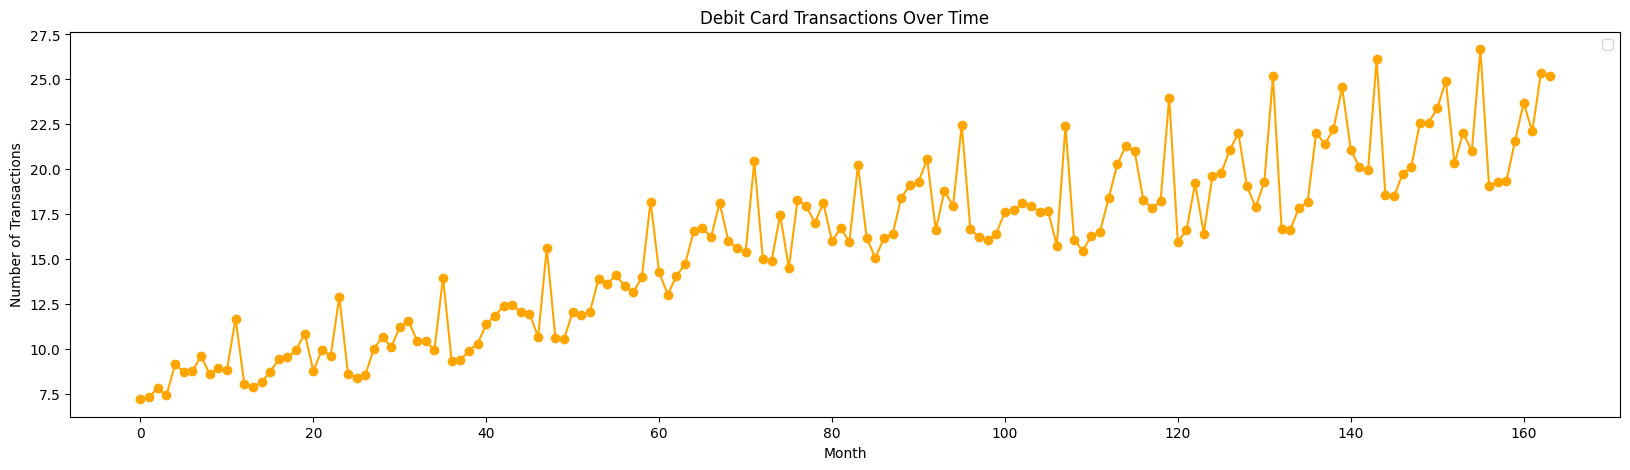

In [61]:
# visualize the data
plt.figure(figsize=(20,5))
plt.plot(data['value'], marker='o', color='orange')
plt.title('Debit Card Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

The graph above, shows 163 months from 2000 to 2013 data. Visually, we can see that it has quite a pattern in a span of 20 months there is always 1 high spiking peak of debit card transaction to calculate it mathematically 20 months is 2 years 